## EX1. Tips dataset

In [1]:
import nhandv6_package_1 as dvn
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


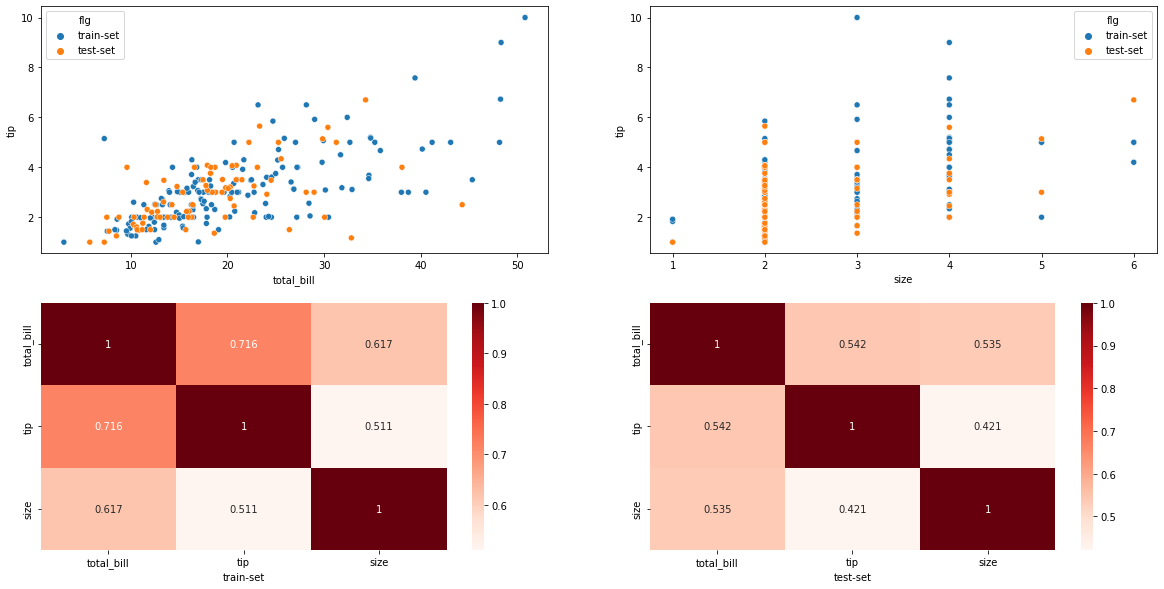

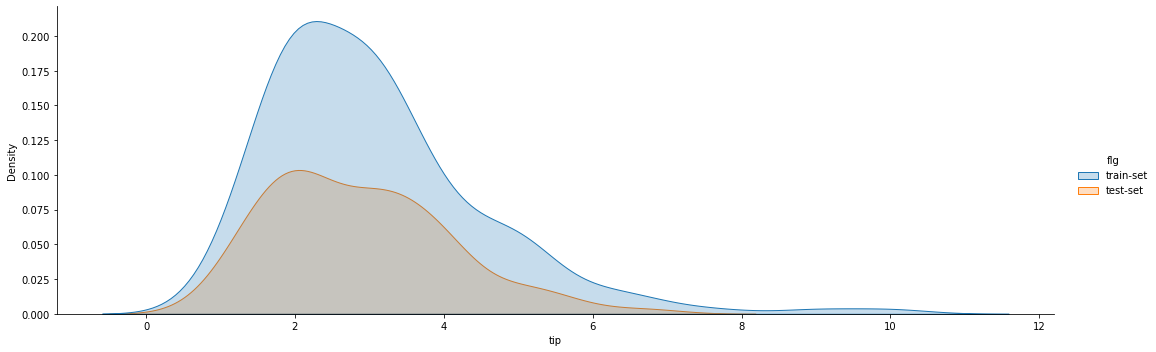

In [2]:
df_train, df_test = dvn.split_data(tips_df, ['sex', 'smoker', 'time'], test_size = 0.33)
dvn.regression_compare(df_train, df_test, 'tip')

In [3]:
dvn.count_unique_and_mode(df_train, df_test)

,col_type,"(mode-vl, freq, Nb_unique)_train-set","(mode-vl, freq, Nb_unique)_test-set",is_all-test_contained_in_train ?
col_name,,,,
total_bill,float64,"(10.07, 2, 158)","(17.92, 2, 79)",Ignored! This column is numeric
tip,float64,"(2.0, 21, 98)","(2.0, 12, 44)",Ignored! This column is numeric
day,category,"(Sat, 57, 4)","(Sat, 30, 4)",True
size,int64,"(2, 100, 6)","(2, 56, 6)",Ignored! This column is numeric
sex,category,"(Male, 105, 2)","(Male, 52, 2)",True
smoker,category,"(No, 101, 2)","(No, 50, 2)",True
time,category,"(Dinner, 117, 2)","(Dinner, 59, 2)",True
flg,object,"(train-set, 163, 1)","(test-set, 81, 1)","(False, {test-set})"


0.5186856884827789
0.2904743473129342


(array([0.10027758, 0.16557033]), 0.5711391866082138)

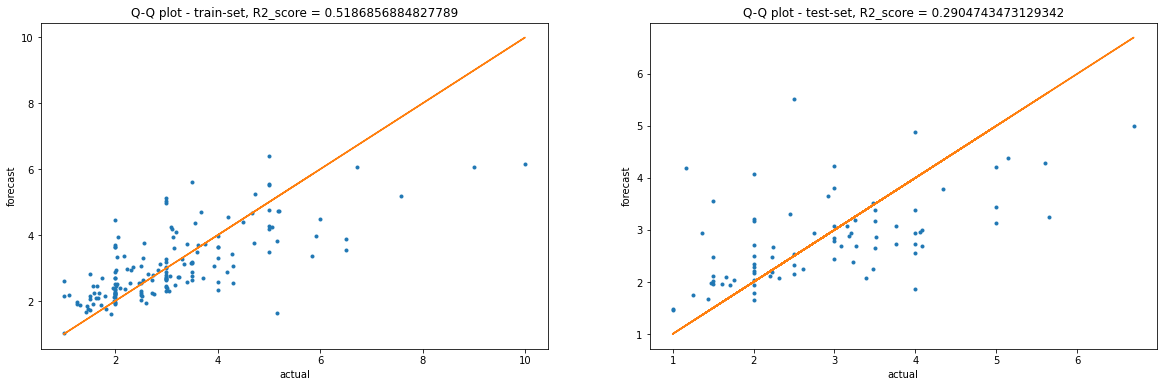

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

inp_cols = ['total_bill', 'size']
fill_vl = df_train[inp_cols].mean()

X_train, y_train = dvn.load_data(df_train, fill_vl = fill_vl, 
                                  target_col = 'tip', 
                                  inp_col_names = inp_cols)
X_test, y_test = dvn.load_data(df_test, fill_vl = fill_vl, 
                                  target_col = 'tip', 
                                  inp_col_names = inp_cols)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)
clf.coef_, clf.intercept_

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('np.log(tip) ~ np.log(total_bill) + size', data=df_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     85.95
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           4.46e-26
Time:                        09:19:26   Log-Likelihood:                -38.004
No. Observations:                 163   AIC:                             82.01
Df Residuals:                     160   BIC:                             91.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9457      0

### Model 2.

0.5144561551701523 0.7172559899855507
0.3767288417436806 0.6173848687100116


(array([ 0.77568441, -0.018221  ]), -0.10055357321553116)

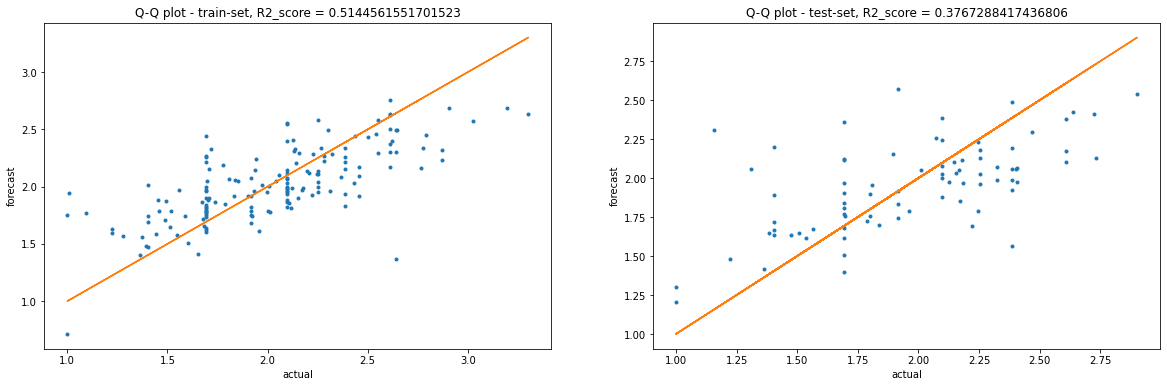

In [6]:
df_train['log_tt_bill'] = df_train['total_bill'].apply(lambda x : np.log(x))
df_train['log_tip'] = df_train['tip'].apply(lambda x: 1+np.log(x))
df_train['price/size'] = df_train['total_bill'] / df_train['size']

df_test['log_tt_bill'] = df_test['total_bill'].apply(lambda x : np.log(x))
df_test['log_tip'] = df_test['tip'].apply(lambda x: 1+np.log(x))
df_test['price/size'] = df_test['total_bill'] / df_test['size']
inp_cols = ['log_tt_bill', 'price/size']

X_train, y_train = dvn.load_data(df_train, fill_vl = fill_vl, 
                                  target_col = 'log_tip', 
                                  inp_col_names = inp_cols)
X_test, y_test = dvn.load_data(df_test, fill_vl = fill_vl, 
                                  target_col = 'log_tip', 
                                  inp_col_names = inp_cols)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train), np.corrcoef(clf.predict(X_train), y_train)[0, 1])
print(clf.score(X_test, y_test), np.corrcoef(clf.predict(X_test), y_test)[0, 1])

dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)
clf.coef_, clf.intercept_

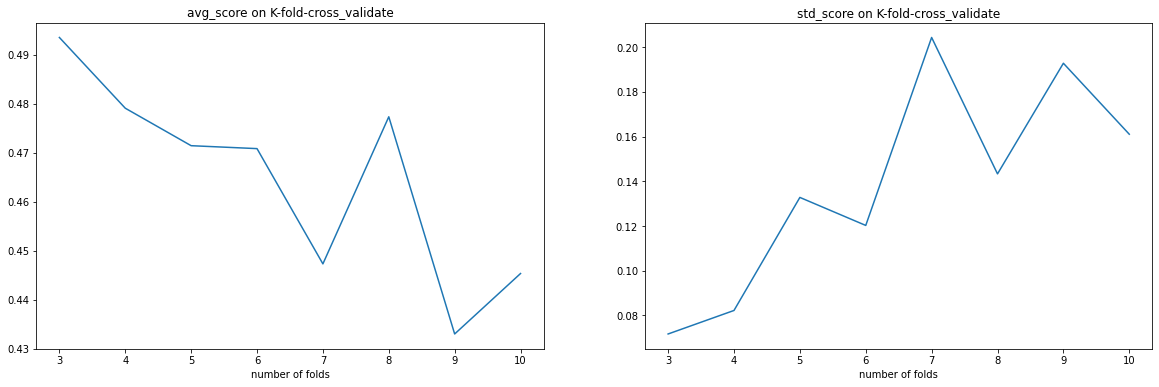

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

clf = LinearRegression()
dvn.avg_std_KFold_plot_(clf, 3, 10, X_train, y_train)    

### Model 3. Grid-search CV

In [8]:
data_train = dvn.df_encode_category(df_train, 'log_tip').drop(columns = ['total_bill', 'size', 'tip'])
data_test = dvn.df_encode_category(df_test, 'log_tip').drop(columns = ['total_bill', 'size', 'tip'])

x_train, y_train = data_train.drop(columns = 'log_tip'), data_train['log_tip']
x_test, y_test = data_test.drop(columns = 'log_tip'), data_test['log_tip']

In [9]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

kfold_cv = KFold(n_splits = 3, shuffle = True, random_state = 53)
MLA_df = pd.DataFrame(columns = ['MLA_name', 'train-test.shape', 'trained_time', 'best_params', 
                                 'std_score_kfolds', 'train_score', 'test_score', 
                                 'MAPE_test', 'MAE_test', 'MSE_test', 'Pearson_corr'
                                ]                       
                     )
parameters = {
              'n_estimators': [50, 100, 150],
              'criterion' : ["squared_error", "absolute_error"],
              'max_depth': [8, 10, 12],
              'bootstrap' : [True] # [True, False]
             }
MLA_df.loc[1] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       ExtraTreesRegressor(), parameters, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239


In [10]:
params = {
            'n_estimators': [80, 100, 200],
            'max_depth': [5, 7, 9, 11],
            'min_samples_split': [1, 3],
            'min_samples_leaf': [1, 3],
            'bootstrap' : [True] # [True, False]
          }

MLA_df.loc[2] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       RandomForestRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
2,RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130


In [11]:
from sklearn.linear_model import Ridge, Lasso
params = {
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
            'max_iter' : [100, 1000, 10000],
            'tol': [1e-1, 1e-3, 1e-5], 
            'alpha': [1.0, 0.1, 0.01]
        }
MLA_df.loc[3] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       Ridge(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
2,RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130
3,Ridge,"((106, 6), (27, 6))",0 mins 2.52 seconds,"{'alpha': 1.0, 'max_iter': 100, 'solver': 'lsq...",0.167316,0.653551,0.527413,0.091074,0.184789,0.061279,0.762981


In [12]:
params = {
            'selection': ['cyclic', 'random'],
            'max_iter' : [100, 1000, 10000],
            'tol': [1e-1, 1e-3, 1e-5], 
            'alpha': [1.0, 0.1, 0.01]
        }

MLA_df.loc[4] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       Lasso(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
2,RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130
3,Ridge,"((106, 6), (27, 6))",0 mins 2.52 seconds,"{'alpha': 1.0, 'max_iter': 100, 'solver': 'lsq...",0.167316,0.653551,0.527413,0.091074,0.184789,0.061279,0.762981
4,Lasso,"((106, 6), (27, 6))",0 mins 0.94 seconds,"{'alpha': 0.01, 'max_iter': 10000, 'selection'...",0.004558,0.639190,0.481678,0.094921,0.191400,0.067210,0.728046


In [13]:
params = {
            'n_jobs' : [1, 2, 3, 4],
            'normalize' : [True, False]
          }
MLA_df.loc[5] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       LinearRegression(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
2,RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130
3,Ridge,"((106, 6), (27, 6))",0 mins 2.52 seconds,"{'alpha': 1.0, 'max_iter': 100, 'solver': 'lsq...",0.167316,0.653551,0.527413,0.091074,0.184789,0.061279,0.762981
4,Lasso,"((106, 6), (27, 6))",0 mins 0.94 seconds,"{'alpha': 0.01, 'max_iter': 10000, 'selection'...",0.004558,0.639190,0.481678,0.094921,0.191400,0.067210,0.728046
5,LinearRegression,"((106, 6), (27, 6))",0 mins 0.16 seconds,"{'n_jobs': 1, 'normalize': False}",0.176576,0.655855,0.534346,0.091580,0.184894,0.060380,0.768504


In [14]:
params = {'n_estimators': [100, 150, 200],
          'loss': ['squared_error', 'absolute_error'],
          'learning_rate': [0.1, 1e-3],
          'max_depth': [8, 15]          
         }
MLA_df.loc[6] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       GradientBoostingRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
1,ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
2,RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130
3,Ridge,"((106, 6), (27, 6))",0 mins 2.52 seconds,"{'alpha': 1.0, 'max_iter': 100, 'solver': 'lsq...",0.167316,0.653551,0.527413,0.091074,0.184789,0.061279,0.762981
4,Lasso,"((106, 6), (27, 6))",0 mins 0.94 seconds,"{'alpha': 0.01, 'max_iter': 10000, 'selection'...",0.004558,0.639190,0.481678,0.094921,0.191400,0.067210,0.728046
5,LinearRegression,"((106, 6), (27, 6))",0 mins 0.16 seconds,"{'n_jobs': 1, 'normalize': False}",0.176576,0.655855,0.534346,0.091580,0.184894,0.060380,0.768504
6,GradientBoostingRegressor,"((106, 6), (27, 6))",0 mins 50.14 seconds,"{'learning_rate': 0.1, 'loss': 'absolute_error...",0.235352,0.993391,0.382258,0.117535,0.235793,0.080101,0.705455


In [15]:
params = {'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 1e-3, 1e-5]
         }
MLA_df.loc[7] = dvn.Grid_search_values(x_train, y_train, x_test, y_test, 
                                       AdaBoostRegressor(), params, kfold_cv)
MLA_df = MLA_df.sort_values(by = ['test_score', 'MAPE_test', 'Pearson_corr'],
                            ascending = False
                           ).set_index('MLA_name')
MLA_df

,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
MLA_name,,,,,,,,,,
LinearRegression,"((106, 6), (27, 6))",0 mins 0.16 seconds,"{'n_jobs': 1, 'normalize': False}",0.176576,0.655855,0.534346,0.091580,0.184894,0.060380,0.768504
Ridge,"((106, 6), (27, 6))",0 mins 2.52 seconds,"{'alpha': 1.0, 'max_iter': 100, 'solver': 'lsq...",0.167316,0.653551,0.527413,0.091074,0.184789,0.061279,0.762981
Lasso,"((106, 6), (27, 6))",0 mins 0.94 seconds,"{'alpha': 0.01, 'max_iter': 10000, 'selection'...",0.004558,0.639190,0.481678,0.094921,0.191400,0.067210,0.728046
ExtraTreesRegressor,"((106, 6), (27, 6))",0 mins 9.06 seconds,"{'bootstrap': True, 'criterion': 'absolute_err...",0.252222,0.855596,0.459054,0.102586,0.206994,0.070143,0.729239
AdaBoostRegressor,"((106, 6), (27, 6))",0 mins 6.65 seconds,"{'learning_rate': 0.001, 'n_estimators': 150}",0.194786,0.718399,0.454276,0.101196,0.200621,0.070763,0.721853
RandomForestRegressor,"((106, 6), (27, 6))",0 mins 17.23 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.247654,0.792494,0.419618,0.110414,0.218199,0.075257,0.727130
GradientBoostingRegressor,"((106, 6), (27, 6))",0 mins 50.14 seconds,"{'learning_rate': 0.1, 'loss': 'absolute_error...",0.235352,0.993391,0.382258,0.117535,0.235793,0.080101,0.705455


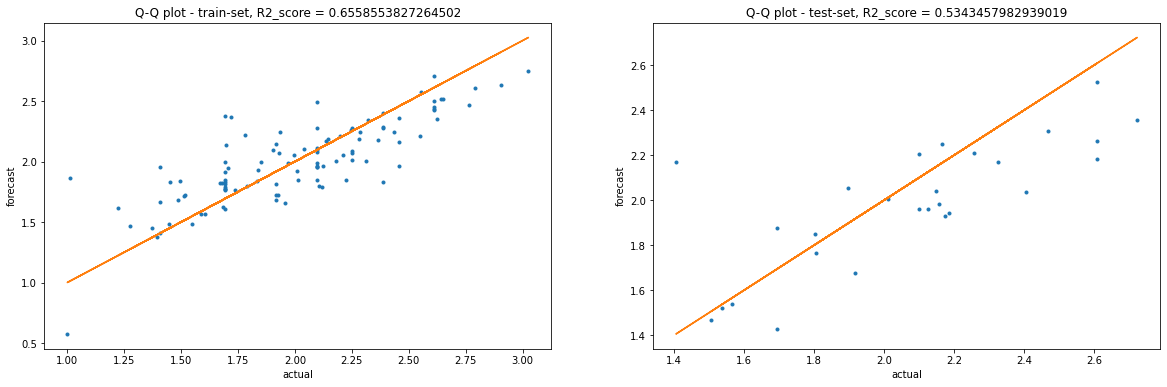

In [16]:
best_params = MLA_df['best_params']['LinearRegression']
clf = LinearRegression(**best_params)
dvn.Q_Q_plot(clf, x_train, x_test, y_train, y_test)

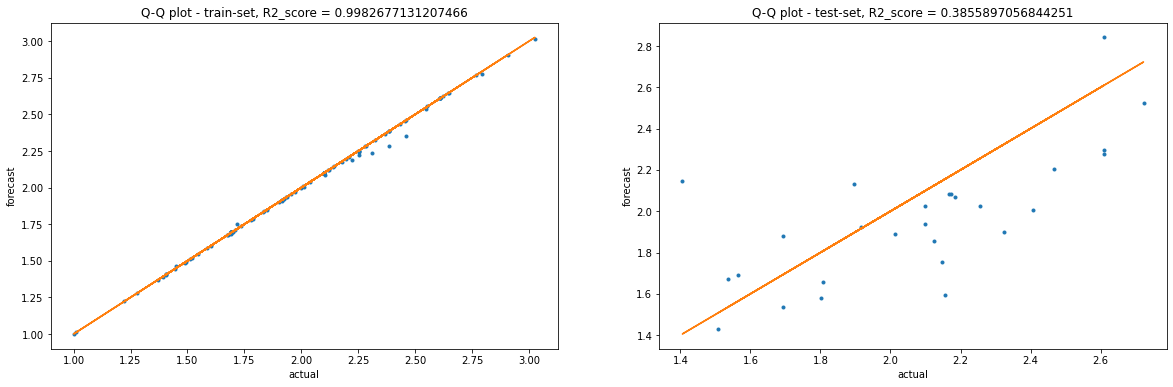

In [17]:
overfit_params = MLA_df['best_params']['GradientBoostingRegressor']
clf = GradientBoostingRegressor(**overfit_params)
dvn.Q_Q_plot(clf, x_train, x_test, y_train, y_test)

### If we try to explain the regression_curve through at most data-points that possible, this can make overfit!

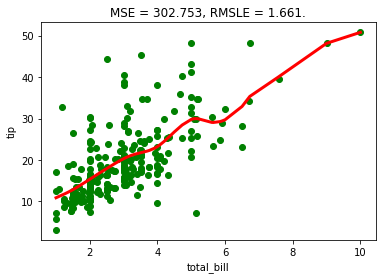

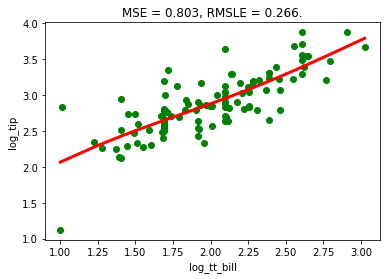

In [18]:
import matplotlib.pyplot as plt
    
dvn.view_local_simple_regression(tips_df, "tip", "total_bill")
dvn.view_local_simple_regression(data_train, 'log_tip', "log_tt_bill")

## EX 2.

In [19]:
wage_train_url = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/wages_train.csv"
wage_test_url = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/wages_test.csv"
wage_train = pd.read_csv(wage_train_url)
wage_test = pd.read_csv(wage_test_url)
wage_train.head()

,wages,w_hours,w_days,kpi,base,age,nationality,gender
0,148.07,36.3,7,0.8,121,21.0,NE,F
1,35.55,15.1,2,1.2,238,19.0,TN,F
2,4.50,5.5,1,0.8,217,19.0,NE,M
3,2822.80,133.5,18,1.0,242,42.0,DE,M
4,7.23,7.4,1,1.0,162,18.0,NI,M


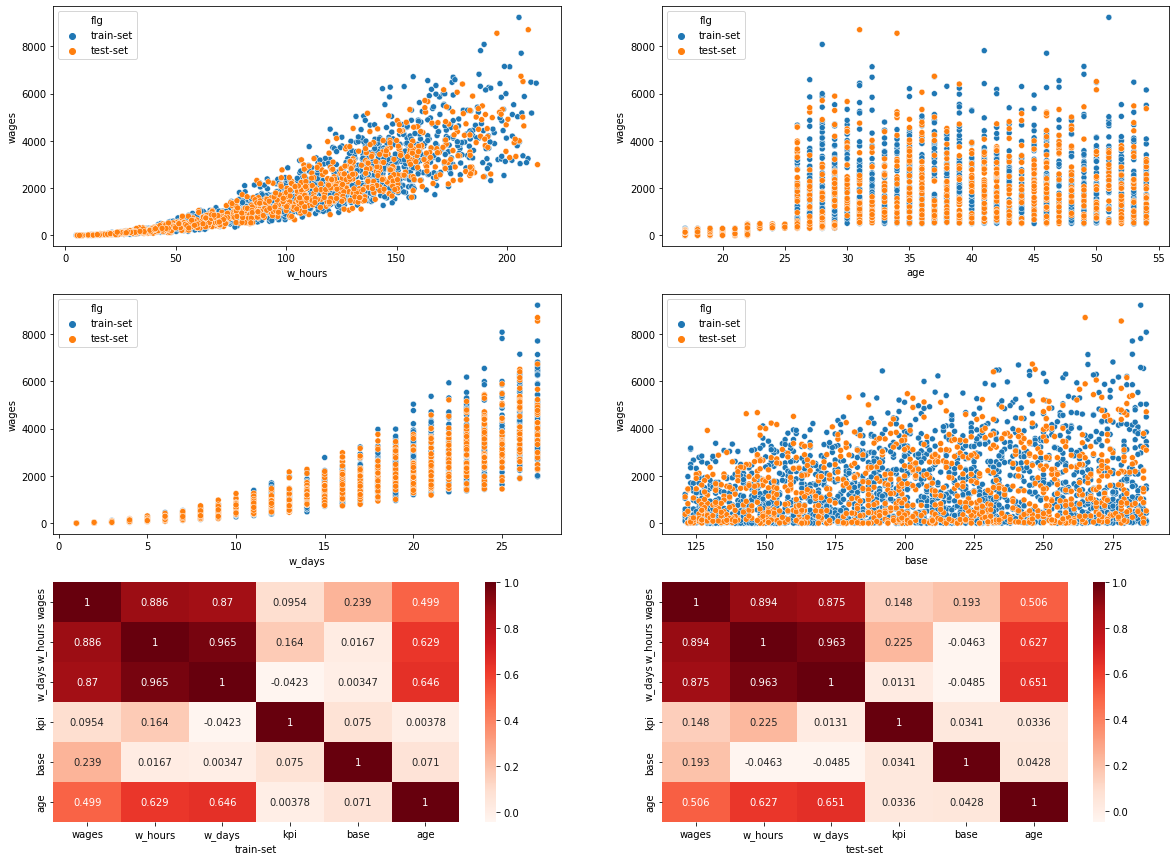

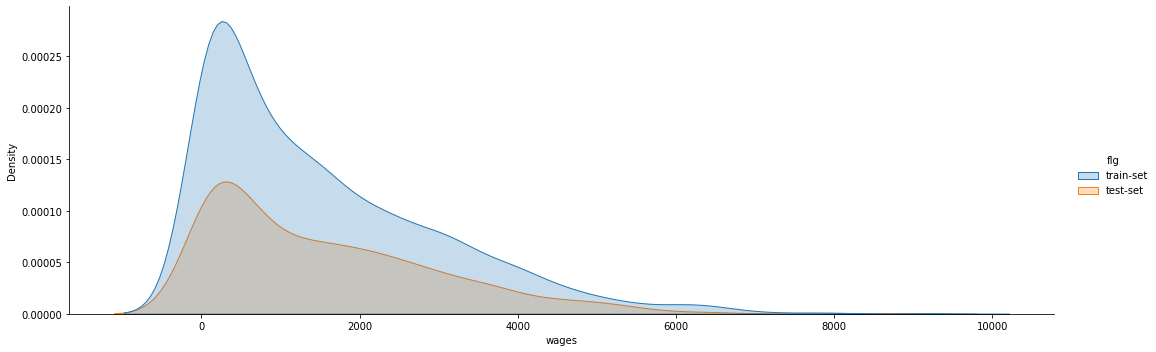

In [20]:
dvn.regression_compare(wage_train , wage_test, 'wages')

0.8531391478119436
0.8684216031679661


(array([  21.69914054,   43.8763406 , -368.21136445,    7.46731557,
         -18.74330664]),
 -1596.7930876379144)

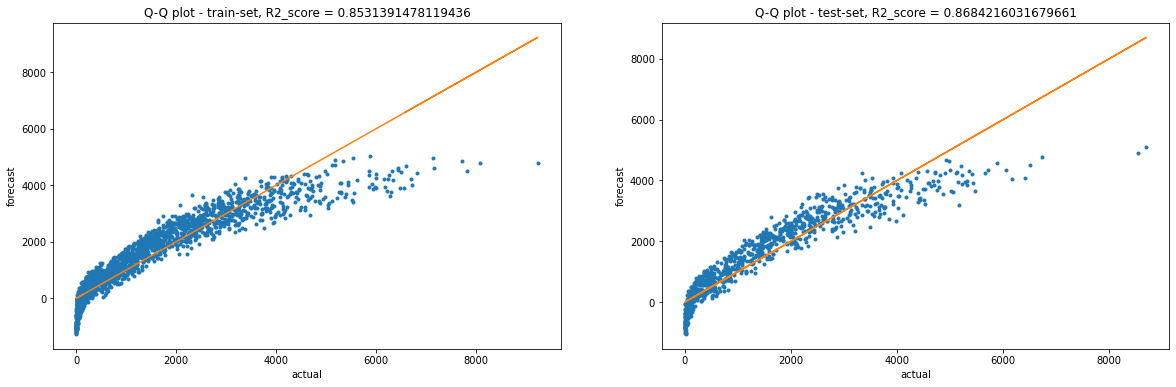

In [21]:
inp_cols = ['w_hours', 'w_days', 'kpi', 'base', 'age']
fill_vl = wage_train[inp_cols].mean()

X_train, y_train = dvn.load_data(wage_train, fill_vl = fill_vl, 
                                  target_col = 'wages', 
                                  inp_col_names = inp_cols)
X_test, y_test = dvn.load_data(wage_test, fill_vl = fill_vl, 
                                  target_col = 'wages', 
                                  inp_col_names = inp_cols)
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)
clf.coef_, clf.intercept_

### Model 2.
- Firstly, logarithm the `wages`

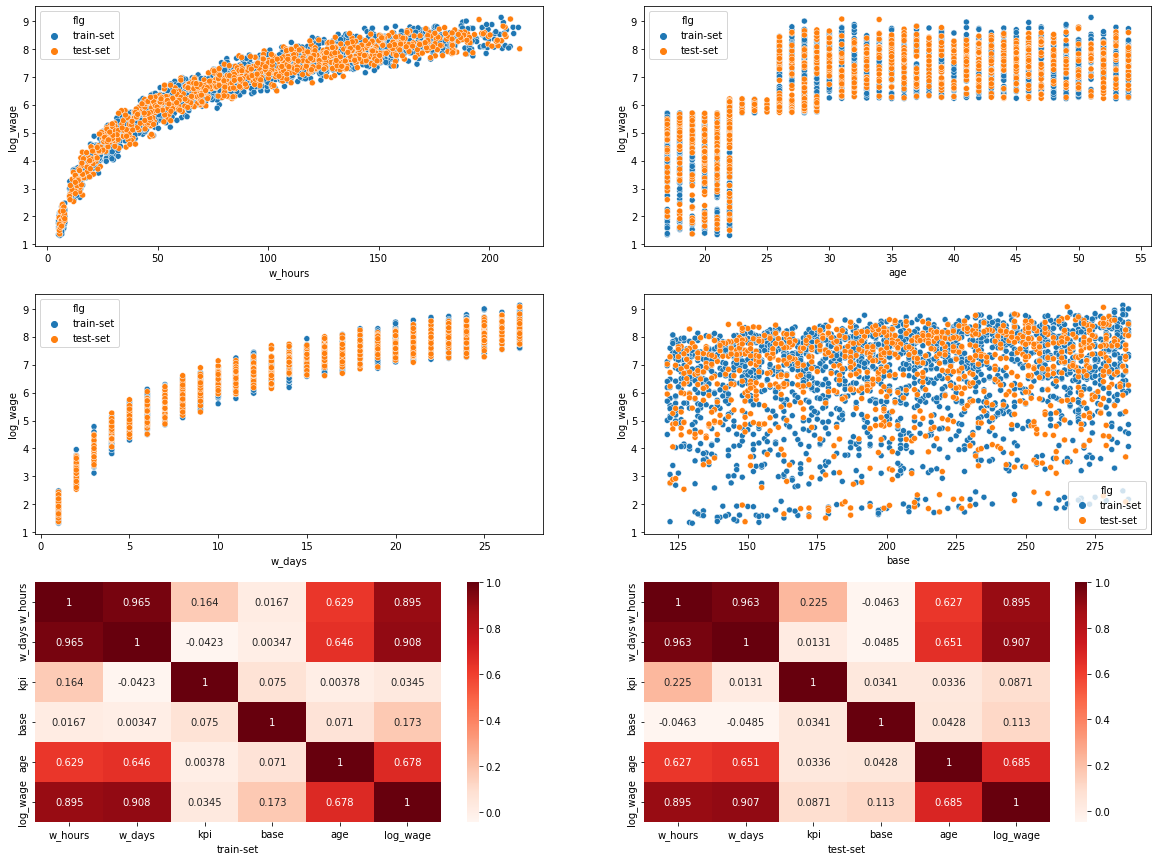

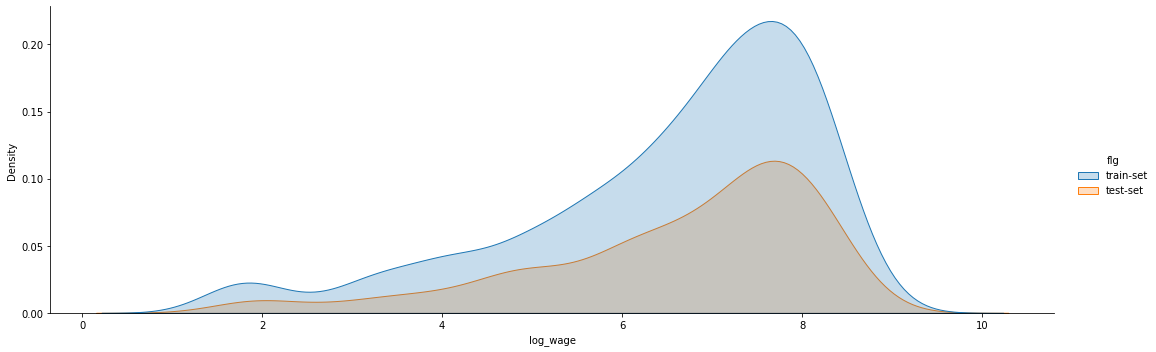

In [22]:
wage_train['log_wage'] = wage_train['wages'].apply(lambda x: np.log(x+1))
wage_test['log_wage'] = wage_test['wages'].apply(lambda x: np.log(x+1))

dvn.regression_compare(wage_train.drop(columns = 'wages'), 
                       wage_test.drop(columns = 'wages'), 
                       'log_wage')

- Next, logarithm the `w_hours` and `w_days`

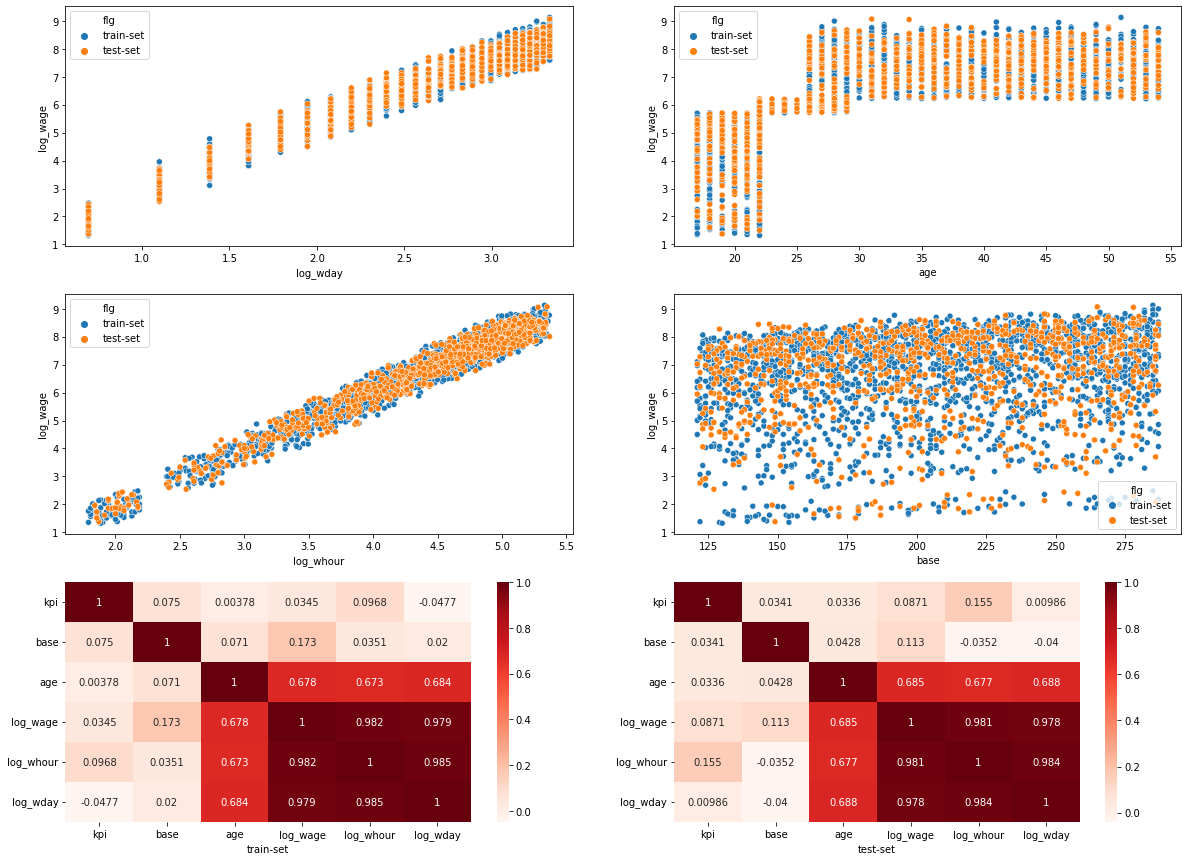

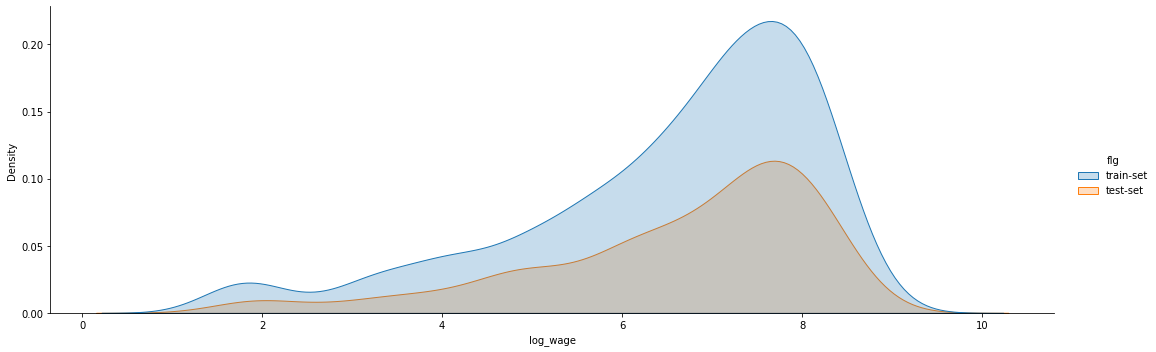

In [25]:
# w_hours
wage_train['log_whour'] = wage_train['w_hours'].apply(lambda x: np.log(x+1))
wage_train['log_wday'] = wage_train['w_days'].apply(lambda x: np.log(x+1))

# w_days
wage_test['log_whour'] = wage_test['w_hours'].apply(lambda x: np.log(x+1))
wage_test['log_wday'] = wage_test['w_days'].apply(lambda x: np.log(x+1))

# show
dvn.regression_compare(wage_train.drop(columns = ['wages', 'w_hours', 'w_days']), 
                       wage_test.drop(columns = ['wages', 'w_hours', 'w_days']), 
                       'log_wage')

- Try the new model

0.9902223133057637
0.989308373438911


(array([ 1.37136369e+00,  7.52822949e-01, -2.90870282e-01,  5.10826421e-03,
         3.95153764e-04]),
 -2.0072211007014458)

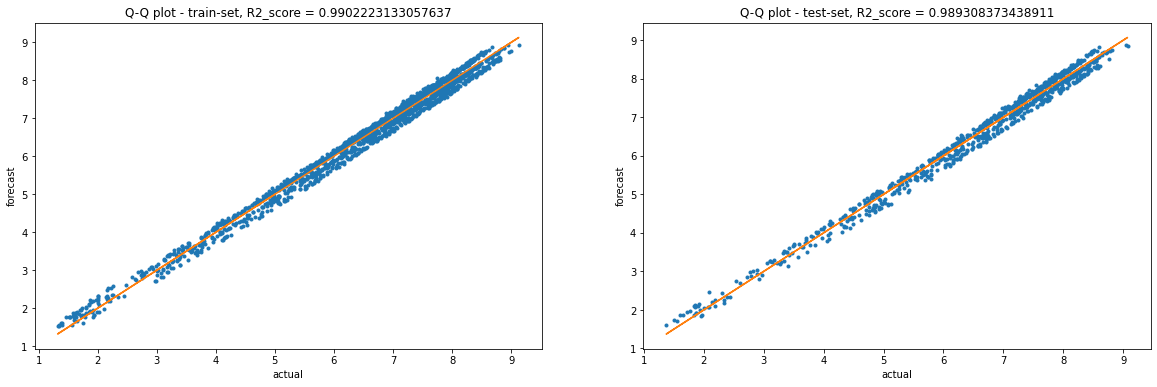

In [27]:
inp_cols = ['log_whour', 'log_wday', 'kpi', 'base', 'age']
fill_vl = wage_train.drop(columns = ['wages', 'w_hours', 'w_days'])[inp_cols].mean()
X_train, y_train = dvn.load_data(wage_train.drop(columns = ['wages', 'w_hours', 'w_days']),
                                 fill_vl = fill_vl, target_col = 'log_wage', 
                                 inp_col_names = inp_cols
                                )
X_test, y_test = dvn.load_data(wage_test.drop(columns = ['wages', 'w_hours', 'w_days']), 
                               fill_vl = fill_vl, target_col = 'log_wage', 
                               inp_col_names = inp_cols
                              )
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)
clf.coef_, clf.intercept_

- Now, we can conclude that the model should be performed as

                log(wages + 1) = beta0 + beta1 * log(w_hours) + beta2 * log(w_days) + beta3 * kpi + beta4 * base + beta5 * age
                
- However, you can apply Grid-SearchCV and RandomSearchCV to improve this score as possible as you try!